***
# **<center>COURS PYTHON 2IMACS #8</center>**
# ***<center>Fichiers</center>***

***

Comme nous avons commencé à le voir, nous allons avoir besoin de charger des données à analyser depuis differents types de fichiers. De même nous aurons besoin de sauver nos analyses pour les partager ou pour des modifications futures. Nous allons donc avoir besoin de créer, modifier et sauver des fichiers. De nombreux formats et methodes sont à notre disponsition pour ces opérations.

Avant  de commencer, précisons qu'il existe 2 manières d'indiquer l'emplacement d'un dossier (ou repertoire) ou d'un fichier.
- Le chemin absolu: spécifie l'emplacement complet d'un fichier ou d'un répertoire à partir de la racine du système de fichiers. Sous Windows, un exemple de chemin absolu serait : "C:\Users\Utilisateur\Documents\mon_fichier.txt". Le chemin absolu fournit l'emplacement précis du fichier indépendamment de l'emplacement courant (en général celui du code python). Attention si on passe sur une autre machine il sera à modifier.
- Un chemin relatif spécifie l'emplacement d'un fichier ou d'un répertoire par rapport à l'emplacement courant. Sous Windows, un exemple de chemin relatif serait : "Documents\mon_fichier.txt". Le chemin relatif indique que le fichier se trouve dans le répertoire "Documents" situé dans le répertoire courant.

Il faut remarquer que suivant les IDE, les chemins peuvent contenir des '/' (par exemple jupyter) ou des '\\' (par exemple spyder)

## 8-1 Création de fichiers

### 8-1-1 Syntaxe 'open' et 'close'

Créeons notre premier fichier. Nous définissons un chemin , ouvrons le fichier, puis le refermons.

In [4]:
chemin = 'mes_fichiers/mon_fichier.txt'
# creer le fichier 
fichier = open(chemin, 'w')
# Fermer le fichier
fichier.close()

### 8-1-2 Syntaxe 'with'

Une autre syntaxe permet de ne pas se préocuper de fermer de la fermeture du fichier, ça peut éviter des oublis et des erreurs...

In [5]:
chemin = 'mes_fichiers/mon_fichier1.txt'

In [6]:
with open(chemin, 'w') as fichier: # creer le fichier
   pass # ne rien faire...

### 8-1-3 Modes d'ouverture des fichiers

Nous avons le choix entre 3 modes d'ouverture des fichiers: 
- Lecture: 'r' : accéder aux données à partir du fichier, mais pas modifier ou écrire de nouvelles données
- Ecriture: 'w' :  créer un nouveau fichier ou écraser le contenu d'un fichier existant
- Ajout: 'a' : écrire de nouvelles données à la fin du fichier sans supprimer son contenu précédent

## 8-2 Lecture et écriture dans un fichier texte

### 8-2-1 Méthodes read() et write()

Ecrire:

In [14]:
chemin = 'mes_fichiers/mon_fichier2'

In [23]:
with open(chemin, 'w') as fichier:
    fichier.write('What... is your favorite color?')

Lire:

In [24]:
with open(chemin, 'r') as fichier:
    contenu = fichier.read()
    print(contenu)

What... is your favorite color?


Ajouter:

In [25]:
with open(chemin, 'a') as fichier:
    fichier.write('Ni - The Knights Who Say Ni')

In [26]:
with open(chemin, 'r') as fichier:
    contenu = fichier.read()
    print(contenu)

What... is your favorite color?Ni - The Knights Who Say Ni


### 8-2-2 Méthodes readline() et readlines()

On pourrait apporter une amélioration, en effet, les differents ajouts vont se faire les uns à la suite des autres. Des retours à la ligne seraient bienvenus. Utilisons les méthodes apropriées.

Pour l'écriture, on se contentera d'ajouter un retour chariot ('\n) en fin de ligne

In [27]:
with open(chemin, 'a') as fichier:
    for i in range(5):
        fichier.write('\nNi')

La methode read affichera l'ensemble du contenu

In [28]:
with open(chemin, 'r') as fichier:
    contenu = fichier.read()
    print(contenu)

What... is your favorite color?Ni - The Knights Who Say Ni
Ni
Ni
Ni
Ni
Ni


Avec la methode readlines, on peut parcourir le fichier ligne à ligne. fichier.readlines() va renvoyer une liste dont chaque élément est le contenu d'une ligne.

In [30]:
with open(chemin, 'r') as fichier:
    lignes = fichier.readlines()  # Lecture de toutes les lignes du fichier
    nombre_lignes = len(lignes)  # Nombre de lignes dans le fichier 
    print('le fichier contient ',nombre_lignes,' lignes')
    print(' le contenu du fichier est: ',lignes)

le fichier contient  6  lignes
 le contenu du fichier est:  ['What... is your favorite color?Ni - The Knights Who Say Ni\n', 'Ni\n', 'Ni\n', 'Ni\n', 'Ni\n', 'Ni']


Cette methode est trés efficace avec une boucle for pour afficher les lignes séparemment

In [31]:
with open(chemin, 'r') as fichier:
    lignes = fichier.readlines()  # Lecture de toutes les lignes du fichier
    for ligne in lignes:
        print(ligne)

What... is your favorite color?Ni - The Knights Who Say Ni

Ni

Ni

Ni

Ni

Ni


## 8-3 Lecture et écriture dans d'autres formats de fichiers

### 8-3-1  Fichiers csv

Pandas permet une manipulation très pratiques des fichiers textes et csv. Créons un pandas datframe

In [2]:
import pandas as pd

# Création d'un DataFrame
data = pd.DataFrame({'Nom': ['Alice', 'Bob', 'Charlie'],
                     'Age': [25, 30, 35]})
data.head()

,Nom,Age
0,Alice,25
1,Bob,30
2,Charlie,35


Sauvegardons dans un fichier texte

In [15]:
data.to_csv('mes_fichiers/ages.txt')

Si on ouvre le fichier, on voit que le format est bien en 2 colonnes. Elles sont séparées par des ',' on peut choisir d'autres séparateurs comme la tabulation, de même, on peut choisir de ne pas afficher les numéros de ligne:

In [17]:
data.to_csv('mes_fichiers/ages.txt', sep='\t',index = False)

Le format csv est bien sûr pris en charge

In [18]:
data.to_csv('mes_fichiers/ages.csv',sep='\t',index = False)

De la même maniere ce type de données peut être chargé avec 

In [19]:
data_lues_csv = pd.read_csv('mes_fichiers/ages.csv', sep='\t')
data_lues_csv.head()

,Nom,Age
0,Alice,25
1,Bob,30
2,Charlie,35


In [20]:
data_lues_txt = pd.read_csv('mes_fichiers/ages.txt', sep='\t')
data_lues_txt.head()

,Nom,Age
0,Alice,25
1,Bob,30
2,Charlie,35


Les fonctions np.savetxt et np.loadtxt de numpy fonctionnent sur le même modéle

In [21]:
import numpy as np
# Création d'un tableau NumPy
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# Écriture du tableau dans un fichier CSV
np.savetxt('mes_fichiers/mon_numpy.csv', data, delimiter='\t')

On peut choisir le format:

In [28]:
np.savetxt('mes_fichiers/mon_numpy.csv', data, delimiter='\t', fmt='%d')

même chose pour le format txt:

In [29]:
np.savetxt('mes_fichiers/mon_numpy.txt', data, delimiter='\t', fmt='%d')

Et pour charger les données:

In [30]:
data_lues_np_csv = np.loadtxt('mes_fichiers/mon_numpy.csv')
print(data_lues_np_csv)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


On a récupéré les données par lignes, pour les récupérer par colonne, il faut utiliser l'argument unpack = True.

In [31]:
data_lues_np_txt = np.loadtxt('mes_fichiers/mon_numpy.txt', unpack = True)
print(data_lues_np_txt)

[[1. 4. 7.]
 [2. 5. 8.]
 [3. 6. 9.]]


### 8-3-2  Matplotlib

Matplotlib offre la possibilité de sauvegarder des graphiques et des figures dans différents formats de fichiers tels que PNG, JPEG, PDF grace à la methode savefig.

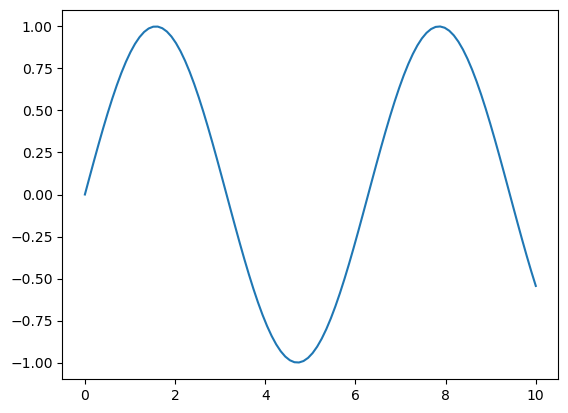

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Exemple 1 : Sauvegarde d'un tracé simple en PNG
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)

plt.savefig('mes_fichiers/plot.jpg')

De même , il est possible de charger un fichier image avec matplotlib

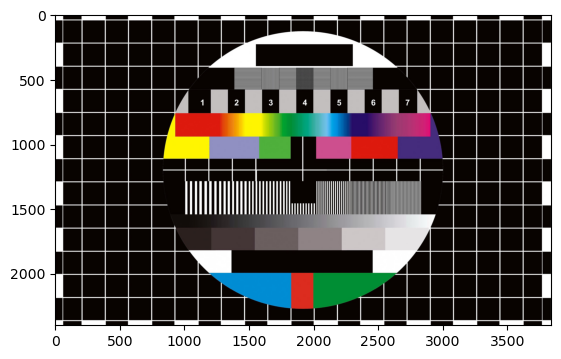

In [2]:
image = plt.imread('image.jpg')


fig, ax = plt.subplots()
ax.imshow(image);

[Exercice 1](exercices/Exercices8_solutions.ipynb)

### 8-3-3  Module pickle pour fichiers binaires

Le module pickle permet de sauvegarder dans un fichier binaire n'importe quel objet python. On peut l'utiliser pour des listes, dictionnaires, tablaux numpy, pandas dataframe...
Reprenons par exemple de dataframe du dernier cours:

In [3]:
import numpy as np
import pandas as pd
data_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
df = pd.DataFrame(data_array)
df.index = ['ligne1', 'ligne2', 'ligne3', 'ligne4']
df.columns = ['colonne1', 'colonne2', 'colonne3']
print(df)

        colonne1  colonne2  colonne3
ligne1         1         2         3
ligne2         4         5         6
ligne3         7         8         9
ligne4        10        11        12


Créons notre fichier pickle

In [4]:
import pickle
chemin = 'mes_fichiers/mon_fichier_pkl.pkl'
with open(chemin, 'wb') as fichier: #on remarque que ici on est en mode lecture (w) et binaire (b)
    pickle.dump(df, fichier)

Bien sûr, le fichier binaire ne sera pas lisible avec un bloc note. Il faudra le charger à nouveau et le traiter comme un fichier pandas.

In [5]:
with open(chemin, 'rb') as fichier:
    df_load = pickle.load(fichier)
print(df_load)

        colonne1  colonne2  colonne3
ligne1         1         2         3
ligne2         4         5         6
ligne3         7         8         9
ligne4        10        11        12


### 8-3-4 Autres types de fichiers

La methode pickle est quasi universelle pour les objets python, cependant, il existe d'autres types de fichiers qui peuvent avoir des interêts dans certaines situations.

| Format de fichier | Intérêt spécifique | Bibliothèque associée | Avantages | Limitations |
|-------------------|--------------------|----------------------|-----------|-------------|
| npy`            | Stockage efficace et compact de tableaux NumPy | NumPy | - Compatibilité totale avec les tableaux NumPy. <br> - Lecture et écriture rapides des tableaux NumPy. <br> - Conservation des métadonnées du tableau. | - Limité aux tableaux NumPy. <br> - Peut ne pas être compatible avec d'autres bibliothèques. |
| HDF5              | Stockage de données scientifiques complexes et hiérarchiques | h5py (Python) | - Prise en charge de structures de données complexes. <br> - Compression des données. <br> - Lecture et écriture efficaces. | - Courbe d'apprentissage plus longue. <br> - Certaines fonctionnalités avancées peuvent être complexes. |
| JSON              | Stockage de données structurées lisibles par l'homme | json (Python) | - Facilité de lecture et d'écriture. <br> - Compatibilité multi-langages. <br> - Prise en charge des types de données courants. | - Moins efficace en termes d'espace de stockage et de performance. <br> - Limité aux types de données simples. |


## 8-4 Manipulations avancées de fichier et interaction avec le système d'explotation

### 8-4-1 os : interaction avec le système d'exploitation

Création de répertoire

In [7]:
import os
chemin = 'mes_fichiers/mon_repertoire'
os.mkdir(chemin)

Si on tente d'éxecuter à nouveau le code, on a une erreur, car le fichier existe déja, mais on peut testerr son existence. 

In [8]:
import os
chemin = 'mes_fichiers/mon_repertoire'
if os.path.exists(chemin):
    print('le dossier existe déja!')
else:
    os.mkdir(chemin)
    print('le dossier a été crée')

le dossier existe déja!


De la meme maniere, on peut effacer des fichiers

In [9]:
chemin = 'mes_fichiers/mon_fichier.txt'
if os.path.exists(chemin):
    os.remove(chemin)
    print('fichier effacé')
else:
    print('fichier inexistant')

fichier inexistant


On peut renommer un fichier ou un repertoire

In [10]:
chemin = 'mes_fichiers/mon_fichier2'
if os.path.exists(chemin):
    os.rename(chemin,chemin+'_new')
    print('fichier renommé')
else:
    print('fichier inexistant')

fichier inexistant


On peut obtenir la liste des fichiers contenus dans un dossier

In [11]:
chemin = 'mes_fichiers'
os.listdir(chemin)

['.ipynb_checkpoints',
 'ages.csv',
 'ages.txt',
 'exercices',
 'mon_fichier1.txt',
 'mon_fichier2_new',
 'mon_fichier_pkl.pkl',
 'mon_numpy.csv',
 'mon_numpy.txt',
 'mon_repertoire',
 'mon_repertoire_old',
 'old',
 'plot.jpg']

On peut assembler des noms de dossier et de fichier pour faire des chemins

In [12]:
dossier = 'mes_fichiers/'
fichier = 'mon_fichier1.txt'
chemin = os.path.join(dossier,fichier)
print(chemin)

mes_fichiers/mon_fichier1.txt


### 8-4-2 glob : Traitement de fichiers et dossiers en lots

glob permet de parcourir facilement les répertoires et de filtrer les fichiers en fonction de leur nom ou de leur extension.

Lister les fichiers d'un repertoire:

In [13]:
import glob

# Liste tous les fichiers dans le répertoire "mes_fichiers"
fichiers = glob.glob('mes_fichiers/*')

# Parcours la liste des fichiers et les affiche
for fichier in fichiers:
    print(fichier)


mes_fichiers\ages.csv
mes_fichiers\ages.txt
mes_fichiers\exercices
mes_fichiers\mon_fichier1.txt
mes_fichiers\mon_fichier2_new
mes_fichiers\mon_fichier_pkl.pkl
mes_fichiers\mon_numpy.csv
mes_fichiers\mon_numpy.txt
mes_fichiers\mon_repertoire
mes_fichiers\mon_repertoire_old
mes_fichiers\old
mes_fichiers\plot.jpg


On peut limiter à un type de fichier, demandons ici uniquement les fichiers pickle

In [14]:
# Liste tous les fichiers texte dans le répertoire "mes_fichiers"
fichiers_texte = glob.glob('mes_fichiers/*.pkl')

# Parcours la liste des fichiers et les affiche
for fichier in fichiers_texte:
    print(fichier)


mes_fichiers\mon_fichier_pkl.pkl


On peut réaliser des opérations de tri, par exemple par date:

In [15]:


# Définir le chemin du répertoire
chemin = 'mes_fichiers/'

# Obtenir la liste des fichiers dans le répertoire
fichiers = glob.glob(os.path.join(chemin, '*'))

# Trier les fichiers par date de modification
fichiers_tries_par_date = sorted(fichiers, key=os.path.getmtime)

# Afficher les fichiers triés par date
for fichier in fichiers_tries_par_date:
    print(fichier)

mes_fichiers\mon_repertoire_old
mes_fichiers\exercices
mes_fichiers\old
mes_fichiers\mon_fichier1.txt
mes_fichiers\mon_fichier2_new
mes_fichiers\ages.txt
mes_fichiers\ages.csv
mes_fichiers\mon_numpy.csv
mes_fichiers\mon_numpy.txt
mes_fichiers\plot.jpg
mes_fichiers\mon_fichier_pkl.pkl
mes_fichiers\mon_repertoire


ou par nom

In [16]:
# Obtenir la liste des fichiers dans le répertoire
fichiers = glob.glob(os.path.join(chemin, '*'))

# Trier les fichiers par nom
fichiers_tries_par_nom = sorted(fichiers, key=os.path.basename)

# Afficher les fichiers triés par nom
for fichier in fichiers_tries_par_nom:
    print(fichier)

mes_fichiers\ages.csv
mes_fichiers\ages.txt
mes_fichiers\exercices
mes_fichiers\mon_fichier1.txt
mes_fichiers\mon_fichier2_new
mes_fichiers\mon_fichier_pkl.pkl
mes_fichiers\mon_numpy.csv
mes_fichiers\mon_numpy.txt
mes_fichiers\mon_repertoire
mes_fichiers\mon_repertoire_old
mes_fichiers\old
mes_fichiers\plot.jpg


Il existe bien sûr de nombreuses autres fonctions pour os et glob, que je vous invite à rechercher en cas de besoin.

[Exercice 2](exercices/Exercices8_solutions.ipynb)

<!-- ***

# ***<center>Exercices</center>***

*** -->

## Exercice 1

1. Créez un dossier appelé 'exercices' dans le dossier mes_fichiers en utilisant le chemin absolu.
2. Dans le dossier exercices, créez un dossier appelé 'exercice1' et quatre dossiers nommés 'dossier1', 'dossier2', ..., 'dossier4'.
3. Dans le dossier 'dossier1', créez dix fichiers textes appelés 'fichier1.txt', 'fichier2.txt', ..., 'fichier10.txt'.
4. Remplir les 10 fichiers avec chacun 2 colonnes séparées par une tabulation  :
- la premiere contenant des nombres decimaux commençant à 0, jusqu'à 100 avec un pas de 0.5
- la deuxieme contenant un nombre aleatoire obtenu par une distribution gausienne
5. Récupérer les données contenus dans les 10 fichiers texte pour les rassembler dans un pandas dataframe.
On utilisera la fonction  pd.read_csv(filename, sep='\t', header=None, usecols=[1] dans une boucle pour récupérer les nombres aléatoires de chaque fichier.
6. Ajouter des noms aux lignes et aux colonnes
7. Explorer succitement le dataset (regarder quelques lignes, donner les statistiques sur les valeurs aléatoires, representer les distribution des données)

In [75]:
# 1 - creez un dossier appelé 'exercices' dans le dossier mes_fichiers en utilisant le chemin absolu  
import os
chemin = 'C:/Users/cayez/Documents/DONNEES SIMON/cours python 2IMACS/cours 2 IMACS Simon/mes_fichiers/exercices'

# Vérifier si le dossier existe déjà
if os.path.exists(chemin):
    print("Le dossier existe déjà.")
else:
    # Créer le dossier
    os.mkdir(chemin)
    print("Le dossier a été créé avec succès.")


Le dossier existe déjà.


In [76]:
# 2- Dans le dossier exercices creez un dossier appelé 'exercice1' 4 dossiers, nommés 'dossier1', 'dossier2',...'dossier4' dans exercices

chemin = 'C:/Users/cayez/Documents/DONNEES SIMON/cours python 2IMACS/cours 2 IMACS Simon/mes_fichiers/exercices/exercice1'

 #Vérifier si le dossier existe déjà
if os.path.exists(chemin):
    print("Le dossier existe déjà.")
else:
    # Créer le dossier
    os.mkdir(chemin)
    print("Le dossier a été créé avec succès.")

Le dossier existe déjà.


In [77]:

for i in range(1, 5):
    # nom_dossier = f"dossier{i}"
    nom_dossier = 'dossier'+str(i)
    chemin_dossier = os.path.join(chemin, nom_dossier)
    # chemin_dossier = chemin+nom_dossier
    print(chemin_dossier)
    
    # Vérifier si le dossier existe déjà
    if os.path.exists(chemin_dossier):
        print(nom_dossier,' existe déja')

    else:
        # Créer le dossier
        os.mkdir(chemin_dossier)
        print(nom_dossier,' crée avec succès')


C:/Users/cayez/Documents/DONNEES SIMON/cours python 2IMACS/cours 2 IMACS Simon/mes_fichiers/exercices/exercice1\dossier1
dossier1  existe déja
C:/Users/cayez/Documents/DONNEES SIMON/cours python 2IMACS/cours 2 IMACS Simon/mes_fichiers/exercices/exercice1\dossier2
dossier2  existe déja
C:/Users/cayez/Documents/DONNEES SIMON/cours python 2IMACS/cours 2 IMACS Simon/mes_fichiers/exercices/exercice1\dossier3
dossier3  existe déja
C:/Users/cayez/Documents/DONNEES SIMON/cours python 2IMACS/cours 2 IMACS Simon/mes_fichiers/exercices/exercice1\dossier4
dossier4  existe déja


In [78]:
# os.listdir(chemin)

In [79]:
# 3. Dans le dossier 'dossier1', créez dix fichiers textes appelés 'fichier1.txt', 'fichier2.txt', ..., 'fichier10.txt'.

chemin = 'C:/Users/cayez/Documents/DONNEES SIMON/cours python 2IMACS/cours 2 IMACS Simon/mes_fichiers/exercices/exercice1/dossier1'
fichiers = os.listdir(chemin)

# Créer les fichiers
for i in range(1, 11):
    nom_fichier = 'fichier'+str(i)+'.txt'
    chemin_fichier = os.path.join(chemin, nom_fichier)
    
    # Vérifier si le fichier existe déjà
    if os.path.exists(chemin_fichier):
        print(f"Le fichier {nom_fichier} existe déjà.")
    else:
        # Créer le fichier
        with open(chemin_fichier, 'w') as fichier:
            pass
        print(f"Le fichier {nom_fichier} a été créé avec succès.")


Le fichier fichier1.txt existe déjà.
Le fichier fichier2.txt existe déjà.
Le fichier fichier3.txt existe déjà.
Le fichier fichier4.txt existe déjà.
Le fichier fichier5.txt existe déjà.
Le fichier fichier6.txt existe déjà.
Le fichier fichier7.txt existe déjà.
Le fichier fichier8.txt existe déjà.
Le fichier fichier9.txt existe déjà.
Le fichier fichier10.txt existe déjà.


In [80]:
# 4. Remplir les 10 fichiers avec chacun 2 colonnes séparées par une tabulation  :
# - la premiere contenant des nombres decimaux commençant à 0, jusqu'à 100 avec un pas de 0.5
# - la deuxieme contenant un nombre aleatoire obtenu par une distribution gausiienne
import random
import numpy as np

fichiers = os.listdir(chemin)

liste_chemin_absolu = []
for f in fichiers:
    chemin_absolu = os.path.join(chemin,f)
    liste_chemin_absolu.append(chemin_absolu)
    

for filename in liste_chemin_absolu:  
    with open(filename, 'a') as file:
        file.write("Decimal Number\tRandom Number\n")
        decimal_numbers = np.arange(0, 100.5, 0.5)
        for decimal_number in decimal_numbers:
            random_number = random.gauss(0, 1)
            file.write(str(decimal_number) + "\t" + str(random_number) + "\n")


In [81]:
# import pandas as pd

# # Créer un DataFrame vide
# df = pd.DataFrame()

# # Parcourir la liste des chemins absolus
# for chemin_absolu in liste_chemin_absolu:
#     # Lire le fichier en utilisant la tabulation comme délimiteur
#     data = pd.read_csv(chemin_absolu, sep='\t', header=None, usecols=[1])
#     # Ajouter les données à la colonne du DataFrame
#     df = pd.concat([df, data], ignore_index=True)

# # Afficher le DataFrame
# print(df.shape)


In [82]:
#5. Récupérer les données contenus dans les 10 fichiers texte pour les rassembler dans un pandas dataframe.
import pandas as pd

# Créer une liste vide pour stocker les données de chaque colonne
data_columns = []
# colonne1 = pd.read_csv(filename, sep='\t', header=None, usecols=[0])
# data_columns.append(colonne1[0])
# Parcourir la liste des chemins absolus
for filename in liste_chemin_absolu:
    # Lire le fichier en utilisant la tabulation comme délimiteur
    data = pd.read_csv(filename, sep='\t', header=None, usecols=[1])
    # Ajouter les données à la liste des colonnes
    data_columns.append(data[1])

# Créer le DataFrame en utilisant la liste des colonnes
df = pd.DataFrame(data_columns).T

# Afficher le DataFrame
print(df.shape)

(404, 10)


In [83]:
# 6. Ajouter des noms aux lignes et aux colonnes

colonne1 = pd.read_csv(filename, sep='\t', header=None, usecols=[0])
colonne1 = np.array(colonne1)


nom_lignes = np.reshape(colonne1,(colonne1.shape[0],))
print(nom_lignes[0:10])
#Il faut supprimer decimal number en premiere position
# nom_lignes = nom_lignes[1:]
# print(nom_lignes[0:10])

nom_colonnes = list(range(1,11))


print(nom_colonnes)

df.index = nom_lignes
df.columns = nom_colonnes





['Decimal Number' '0.0' '0.5' '1.0' '1.5' '2.0' '2.5' '3.0' '3.5' '4.0']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [84]:
#7. Explorer succitement le dataset (regarder quelques lignes, donner les statistiques sur les valeurs aléatoires, representer les distribution des données)

In [85]:
df.head()

,1,2,3,4,5,6,7,8,9,10
Decimal Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number
0.0,-0.6161171930600359,0.6523650168858657,-0.9294071476220714,0.5944515805184257,0.492589858389415,-1.8385597336704662,1.4917853641313235,0.7171082496374862,-1.4402088487871287,-0.7337867786503398
0.5,0.3399290195571408,-1.1469938922427454,-0.051664242048577017,0.8116199721469439,0.009006884456055493,-0.34612430350938334,1.5298275993260235,0.8788551771019965,0.5483866647720295,-1.1529539042677146
1.0,-0.5008836548911358,-1.3283742290222174,-1.9820499412931922,1.1776846996349606,0.5082141371298028,0.016713796865639095,0.2665744307728523,0.7982627251168141,-0.22460522546681785,-1.0991234184583147
1.5,-0.5946385401004982,-2.199771316782053,-0.630038266159401,-1.8135077333695564,-0.12009214359114047,0.3538121056119762,-1.309707934615143,-0.941106393389689,1.24906469948842,-0.12196791141534652


In [86]:
df.describe()

,1,2,3,4,5,6,7,8,9,10
count,404,404,404,404,404,404,404,404,404,404
unique,403,403,403,403,403,403,403,403,403,403
top,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number,Random Number
freq,2,2,2,2,2,2,2,2,2,2


On remarque que les valeurs ne sont pas traitées comme des valeurs numériques. C'est normal, les valeurs extraites des fichiers textes sont des chaines de caractères. Faisons un conversion du dataframe en float

In [87]:
df = df.drop(index='Decimal Number')
df = df.astype(float)
df.describe()

,1,2,3,4,5,6,7,8,9,10
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.083396,-0.003620,-0.033421,-0.017395,-0.005410,-0.046729,0.111431,-0.036134,0.048114,-0.047755
std,0.954610,1.020011,1.039772,1.014613,1.001318,1.025021,0.980712,1.011152,1.000386,0.965431
min,-2.487107,-2.471980,-3.192280,-3.598566,-2.586697,-3.192722,-2.578267,-3.147783,-3.233722,-2.493960
25%,-0.613981,-0.733787,-0.772582,-0.730308,-0.717069,-0.773643,-0.582000,-0.753223,-0.661370,-0.766785
50%,0.060965,-0.042110,-0.041876,0.005167,-0.030302,-0.025075,0.145320,-0.052894,0.007506,-0.021874
75%,0.686314,0.633288,0.708323,0.669603,0.623182,0.590879,0.803259,0.696431,0.758747,0.558287
max,2.621782,3.102591,2.935577,3.522193,3.083366,2.710005,2.738620,3.335975,2.840128,2.714619


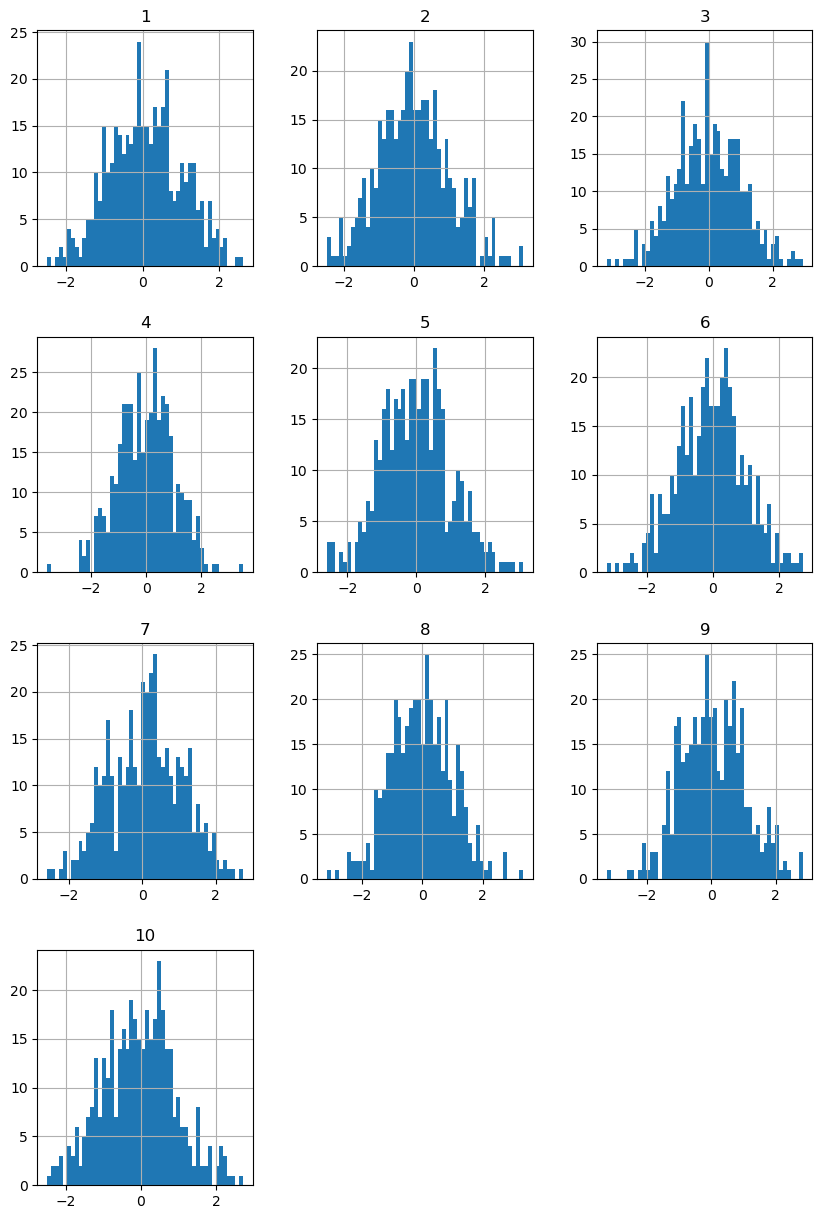

In [88]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(10,15))
plt.show()

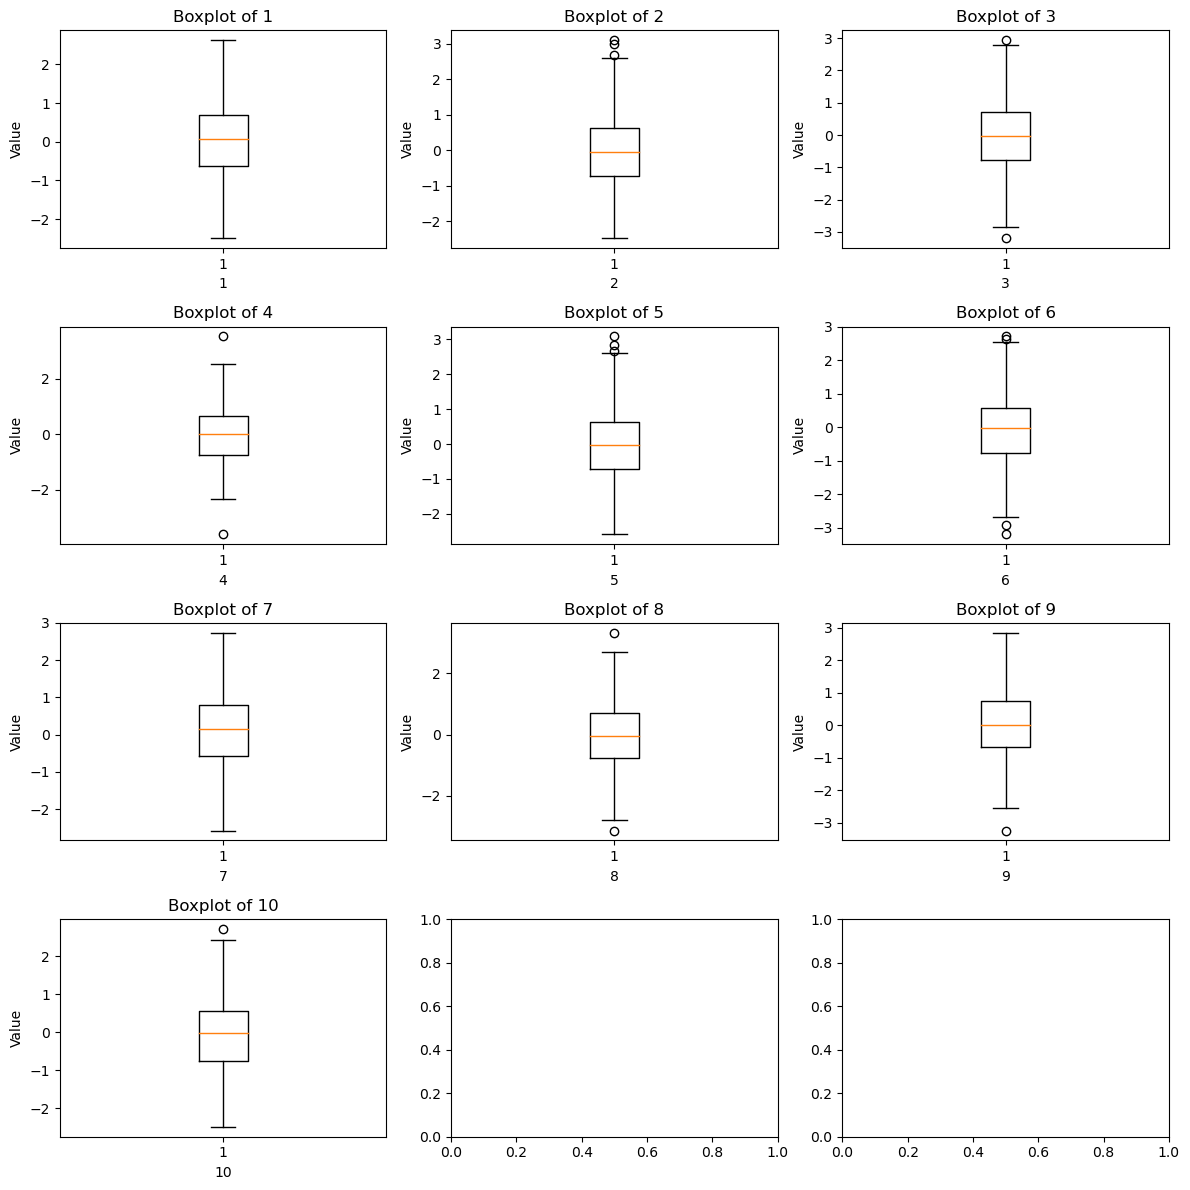

In [89]:
# Créer la figure et les sous-graphiques
fig, axes = plt.subplots(4, 3, figsize=(12, 12))

# Boucle pour tracer les boîtes à moustaches de chaque colonne
for i, column in enumerate(df.columns):
    # Calcul des indices de la position du sous-graphique
    row = i // 3
    col = i % 3
    
    # Tracer la boîte à moustaches de la colonne sur le sous-graphique correspondant
    axes[row, col].boxplot(df[column])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Value')
    axes[row, col].set_title('Boxplot of ' +str(column))

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()
